## Análise de Dados - Casos de Feminicidio na Cidade de São Paulo nos anos de 2015, 2020 e 2021

In [2]:
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt

Leitura dos dados do ano de 2015. No total, foram registrados 41 casos de feminicídio.

In [4]:
df2015 = pd.read_excel("/home/kassia/UFC/ML/Analise de Dados/Feminicidio_2015_2022.xlsx")

In [5]:
df2015.head()


,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,DEINTER 3,SEC Bebedouro,Viradouro,DM - Viradouro,1,1,100215,4,2015,2015-04-27 20:05:42,...,NaN,NaN,Vítima,Feminino,54,1960-06-11,Parda,FAXINEIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
1,DEINTER 2,SEC Jundiaí,Itupeva,DM - Itupeva,1,1,70404,4,2015,2015-04-12 10:36:18,...,NaN,NaN,Vítima,Feminino,44,1970-04-16,Branca,COSTUREIRO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
2,DEINTER 1,SEC São Sebastião,Ubatuba,DM - Ubatuba,1,1,40304,4,2015,2015-04-18 20:23:50,...,NaN,NaN,Vítima,Feminino,37,1977-07-08,Parda,AJUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
3,DECAP,8ª SEC,São Paulo,049 DP - São Mateus,1,1,20249,4,2015,2015-04-25 00:40:09,...,NaN,NaN,Vítima,Feminino,17,1997-12-31,Branca,ESTUDANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
4,DEMACRO,SEC Mogi das Cruzes,Suzano,DM - Suzano,1,1,30309,5,2015,2015-05-16 14:37:19,...,NaN,NaN,Vítima,Feminino,20,1994-07-22,Branca,PRENDAS DOMESTICAS,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...


Filtragem dos casos ocorridos na cidade de São Paulo

In [6]:
df2015=df2015[df2015['MUNICIPIO_CIRCUNSCRICAO']=="São Paulo"]

Exclusão das colunas que não serão utilizados na análise

In [7]:
df2015 = df2015.drop(columns=['DEPARTAMENTO_CIRCUNSCRICAO','SECCIONAL_CIRCUNSCRICAO','HD','Nº DE VÍT HD','ID_DELEGACIA',
                         'NUM_BO','ANO_BO','MUNICIPIO_ELABORACAO','DP_ELABORACAO','SEC_ELABORACAO','DEP_ELABORACAO',
                          'LATITUDE','LONGITUDE','TIPO_PESSOA','SEXO_PESSOA','DATA_NASCIMENTO_PESSOA','LOGRADOURO','NUMERO_LOGRADOURO',
                          'SEC_ELABORACAO','DEP_ELABORACAO','LOGRADOURO','NUMERO_LOGRADOURO','NATUREZA_APURADA','DESDOBRAMENTO'])

In [8]:
df2015.columns.str.lower()

Index(['municipio_circunscricao', 'dp_circunscricao ', 'mês estatistica',
       'ano estatistica', 'datahora_registro_bo', 'data_fato', 'hora_fato',
       'desc_tipolocal', 'idade_pessoa', 'cor_pele', 'profissao'],
      dtype='object')

In [9]:
df2015.columns=df2015.columns.str.lower()

Casos ocorridos na cidade de São Paulo em 2015

In [10]:
df2015

,municipio_circunscricao,dp_circunscricao,mês estatistica,ano estatistica,datahora_registro_bo,data_fato,hora_fato,desc_tipolocal,idade_pessoa,cor_pele,profissao
3,São Paulo,049 DP - São Mateus,4,2015,2015-04-25 00:40:09,2015-04-24,19:49:00,Via pública,17,Branca,ESTUDANTE
6,São Paulo,055 DP - Parque São Rafael,5,2015,2015-05-16 19:57:57,2015-05-16,14:17:00,Residência,30,Parda,ATENDENTE
34,São Paulo,032 DP - Itaquera,11,2015,2015-11-28 17:07:48,2015-11-28,DE MADRUGADA,Residência,30,Branca,OPERADOR(A) TELEMARKETING
35,São Paulo,095 DP - Heliópolis,11,2015,2015-11-04 12:15:35,2015-11-04,10:37:00,Residência,30,Branca,CORRETOR(A) DE IMOVEIS
39,São Paulo,047 DP - Capão Redondo,12,2015,2015-12-21 12:57:28,2015-12-21,09:40:00,Residência,34,Parda,SECRETARIO(A)
40,São Paulo,045 DP - Vila Brasilândia,12,2015,2015-12-21 00:53:24,2015-12-20,21:15:00,Residência,38,Branca,EMPREGADO DOMESTICO


Algumas análises dos dados:

In [11]:
df2015['cor_pele'].value_counts()

Branca    4
Parda     2
Name: cor_pele, dtype: int64

In [12]:
df2015['profissao'].value_counts()

ESTUDANTE                    1
ATENDENTE                    1
OPERADOR(A) TELEMARKETING    1
CORRETOR(A) DE IMOVEIS       1
SECRETARIO(A)                1
EMPREGADO DOMESTICO          1
Name: profissao, dtype: int64

Plotagem de alguns gráficos para visualização de algumas dados sobre os casos de feminicídio ocorridos em 2015.

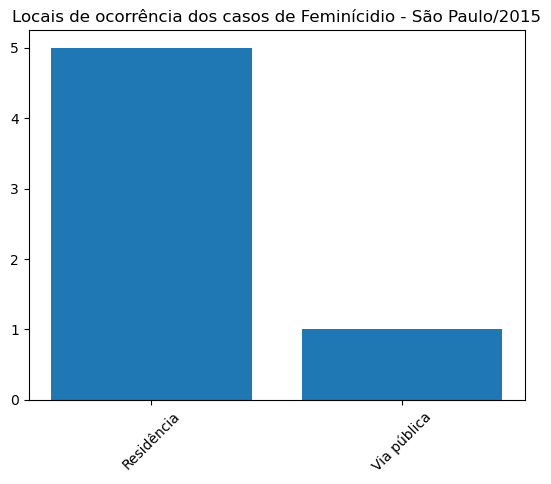

In [13]:
count_local = df2015['desc_tipolocal'].value_counts()
count = count_local.values
tipo = count_local.index
plt.bar(tipo, count)
plt.xticks(rotation=45)
plt.title('Locais de ocorrência dos casos de Feminícidio - São Paulo/2015')
plt.show()

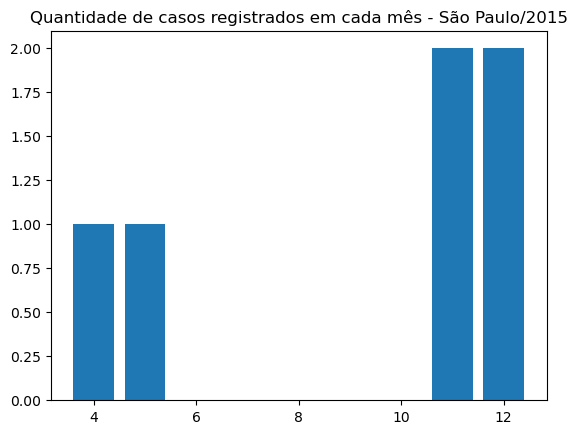

In [36]:
count_mes = df2015['mês estatistica'].value_counts()
count = count_mes.values
tipo = count_mes.index
plt.bar(tipo, count)
plt.title('Quantidade de casos registrados em cada mês - São Paulo/2015')
plt.show()

Leitura dos dados do ano de 2020

In [15]:
df2020 = pd.read_excel("/home/kassia/UFC/ML/Analise de Dados/Feminicidio_2015_2022.xlsx", sheet_name="2020")

Filtragem dos casos ocorridos na cidade de São Paulo

In [16]:
df2020=df2020[df2020['MUNICIPIO_CIRCUNSCRICAO']=="São Paulo"]

Exclusão das colunas que não serão utilizados na análise dos dados

In [17]:
df2020 = df2020.drop(columns=['DEPARTAMENTO_CIRCUNSCRICAO','SECCIONAL_CIRCUNSCRICAO','HD','Nº DE VÍT HD','ID_DELEGACIA',
                         'NUM_BO','ANO_BO','MUNICIPIO_ELABORACAO','DP_ELABORACAO','SEC_ELABORACAO','DEP_ELABORACAO',
                          'LATITUDE','LONGITUDE','TIPO_PESSOA','SEXO_PESSOA','DATA_NASCIMENTO_PESSOA','LOGRADOURO','NUMERO_LOGRADOURO',
                          'SEC_ELABORACAO','DEP_ELABORACAO','LOGRADOURO','NUMERO_LOGRADOURO','NATUREZA_APURADA','DESDOBRAMENTO'])

In [18]:
df2020.columns.str.lower()

Index(['municipio_circunscricao', 'dp_circunscricao ', 'mês estatistica',
       'ano estatistica', 'datahora_registro_bo', 'data_fato', 'hora_fato',
       'desc_tipolocal', 'idade_pessoa', 'cor_pele', 'profissao'],
      dtype='object')

In [19]:
df2020.columns=df2020.columns.str.lower()

Casos ocorridos na cidade de São Paulo em 2020. No total, 40 casos foram registrados na cidade de São Paulo no ano de 2020.

In [20]:
df2020.head()

,municipio_circunscricao,dp_circunscricao,mês estatistica,ano estatistica,datahora_registro_bo,data_fato,hora_fato,desc_tipolocal,idade_pessoa,cor_pele,profissao
0,São Paulo,045 DP - Vila Brasilândia,1,2020,2020-01-29 00:00:00,2020-01-29,10:55:00,Residência,27.0,Parda,BALCONISTA
1,São Paulo,074 DP - Jaraguá,1,2020,2020-01-25 00:00:00,2020-01-25,07:00:00,Residência,21.0,Branca,VENDEDOR(A)
2,São Paulo,100 DP - Jardim Herculano,1,2020,2020-01-04 00:00:00,2020-01-03,23:23:00,Residência,28.0,Branca,AUXILIAR DE ESCRITÓRIO
3,São Paulo,044 DP - Guaianazes,1,2020,2020-01-13 00:00:00,2020-01-13,14:10:00,Residência,29.0,Parda,NaN
12,São Paulo,075 DP - Jardim Arpoador,2,2020,2020-02-19 11:44:00,2020-02-19,10:30:00,Residência,32.0,Parda,NaN


Algumas análises dos dados: 

In [21]:
df2020['cor_pele'].value_counts()

Parda       21
Branca      14
Preta        4
Ignorada     1
Name: cor_pele, dtype: int64

In [22]:
df2020['profissao'].value_counts()

NAO INFORMADA                6
ESTUDANTE                    4
VENDEDOR(A)                  2
CABELEIREIRO(A)              2
ATENDENTE                    2
BALCONISTA                   1
AUXILIAR DE ESCRITÓRIO       1
OUTROS                       1
POLICIAL CIVIL               1
FAXINEIRO(A)                 1
PROFESSOR(A)                 1
RECEPCIONISTA                1
OPERADOR(A) TELEMARKETING    1
METROVIARIO(A)               1
Name: profissao, dtype: int64

Plotagem de alguns gráficos para visualização de algumas dados sobre os casos de feminicídio ocorridos em 2020.

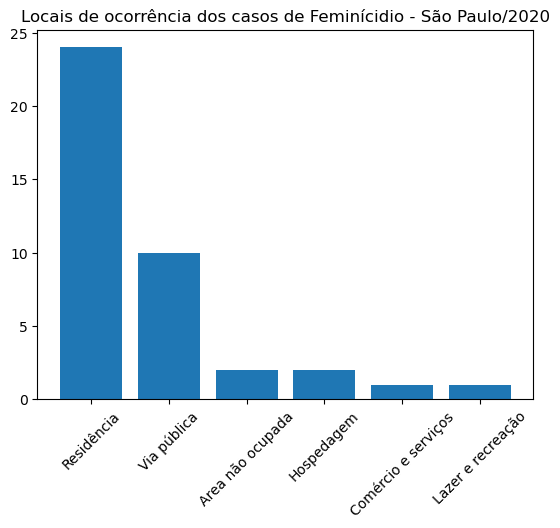

In [23]:
count_local = df2020['desc_tipolocal'].value_counts()
count = count_local.values
tipo = count_local.index
plt.bar(tipo, count)
plt.xticks(rotation=45)
plt.title('Locais de ocorrência dos casos de Feminícidio - São Paulo/2020')
plt.show()

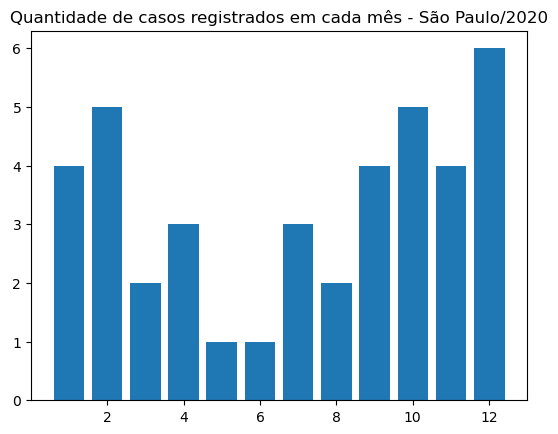

In [24]:
count_mes = df2020['mês estatistica'].value_counts()
count = count_mes.values
tipo = count_mes.index
plt.bar(tipo, count)
plt.title('Quantidade de casos registrados em cada mês - São Paulo/2020')
plt.show()

Leitura dos dados do ano de 2021

In [25]:
df2021 = pd.read_excel("/home/kassia/UFC/ML/Analise de Dados/Feminicidio_2015_2022.xlsx", sheet_name="2021")

Filtragem dos casos ocorridos na cidade de São Paulo

In [26]:
df2021=df2021[df2021['MUNICIPIO_CIRCUNSCRICAO']=="São Paulo"]

Exclusão das colunas que não serão utilizadas na análise dos dados

In [27]:
df2021 = df2021.drop(columns=['DEPARTAMENTO_CIRCUNSCRICAO','SECCIONAL_CIRCUNSCRICAO','HD','Nº DE VÍT HD','ID_DELEGACIA',
                         'NUM_BO','ANO_BO','MUNICIPIO_ELABORACAO','DP_ELABORACAO','SEC_ELABORACAO','DEP_ELABORACAO',
                          'LATITUDE','LONGITUDE','TIPO_PESSOA','SEXO_PESSOA','DATA_NASCIMENTO_PESSOA','LOGRADOURO','NUMERO_LOGRADOURO',
                          'SEC_ELABORACAO','DEP_ELABORACAO','LOGRADOURO','NUMERO_LOGRADOURO','NATUREZA_APURADA','DESDOBRAMENTO'])

In [28]:
df2021.columns.str.lower()

Index(['municipio_circunscricao', 'dp_circunscricao ', 'mês estatistica',
       'ano estatistica', 'datahora_registro_bo', 'data_fato', 'hora_fato',
       'desc_tipolocal', 'idade_pessoa', 'cor_pele', 'profissao'],
      dtype='object')

In [29]:
df2021.columns=df2021.columns.str.lower()

Casos ocorridos na cidade de São Paulo em 2021. No total, 33 casos foram registrados na cidade de São Paulo.

In [30]:
df2021.head()

,municipio_circunscricao,dp_circunscricao,mês estatistica,ano estatistica,datahora_registro_bo,data_fato,hora_fato,desc_tipolocal,idade_pessoa,cor_pele,profissao
0,São Paulo,023 DP - Perdizes,1,2021,2021-01-01,2021-01-01,04:42:00,Hospedagem,35,Parda,NAO INFORMADA
1,São Paulo,080 DP - Vila Joaniza,1,2021,2021-01-03,2021-01-02,21:33:00,Residência,26,Branca,ESTUDANTE
2,São Paulo,098 DP - Jardim Míriam,1,2021,2021-01-02,2021-01-02,11:24:00,Residência,21,Parda,PRENDAS DOMESTICAS
11,São Paulo,028 DP - Freguesia do Ó,2,2021,2021-02-01,2021-02-01,03:27:00,Via pública,30,Parda,DESEMPREGADO(A)
12,São Paulo,073 DP - Jaçanã,2,2021,2021-02-20,2021-02-20,01:30:00,Residência,29,Branca,EMPREGADO DOMESTICO


Análise de alguns dados:

In [33]:
df2021['cor_pele'].value_counts()

Parda       17
Branca      11
Preta        4
Ignorada     1
Name: cor_pele, dtype: int64

In [34]:
df2021['profissao'].value_counts()

NAO INFORMADA          5
ESTUDANTE              3
PRENDAS DOMESTICAS     3
DESEMPREGADO(A)        2
EMPREGADO DOMESTICO    2
MANICURE               2
ATENDENTE              1
APOSENTADO(A)          1
CABELEIREIRO(A)        1
RECEPCIONISTA          1
ARTESAO(A)             1
BABÁ                   1
AUXILIAR DE LIMPEZA    1
Name: profissao, dtype: int64

Plotagem de alguns gráficos para visualização de algumas dados sobre os casos de feminicídio ocorridos em 2021.

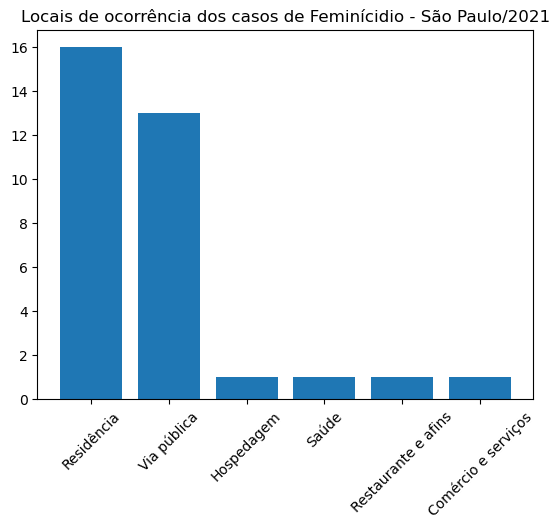

In [35]:
count_local = df2021['desc_tipolocal'].value_counts()
count = count_local.values
tipo = count_local.index
plt.bar(tipo, count)
plt.xticks(rotation=45)
plt.title('Locais de ocorrência dos casos de Feminícidio - São Paulo/2021')
plt.show()

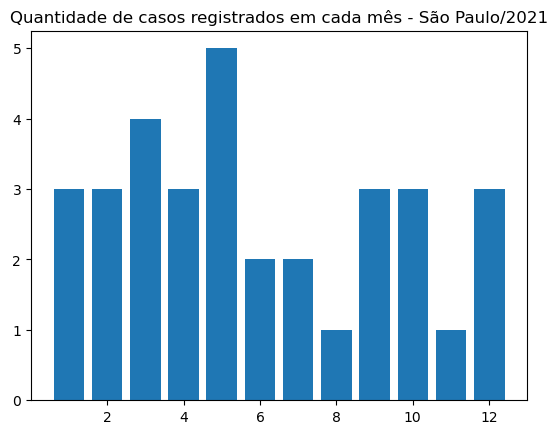

In [59]:
count_mes = df2021['mês estatistica'].value_counts()
count = count_mes.values
tipo = count_mes.index
plt.bar(tipo, count)
plt.title('Quantidade de casos registrados em cada mês - São Paulo/2021')
plt.show()